In [31]:
from scipy.stats import norm
from scipy.integrate import quad
import matplotlib.pyplot as plt
from scipy import interpolate
import numpy as np

In [3]:
def integrate_normal_distribution(a, b, mu=0, sigma=1):
    """
    Integrate the normal distribution from a to b.

    Parameters:
    a (float): The lower limit of integration.
    b (float): The upper limit of integration.
    mu (float): The mean of the normal distribution. Default is 0.
    sigma (float): The standard deviation of the normal distribution. Default is 1.

    Returns:
    float: The result of the integration.
    """
    # Define the probability density function of the normal distribution.
    def pdf(x): return norm.pdf(x, mu, sigma)

    # Integrate the pdf from a to b.
    result, _ = quad(pdf, a, b)

    return result


def demand_function(fare, need):
    """
    Calculate the demand based on the fare and need.

    Parameters:
    fare (float): The fare.
    need (float): The need.

    Returns:
    float: The demand.
    """

    # make fare=500 at mu(=0) in the nomal distribution
    # a mapping between fare(0~3000) and f(-1000~1000)
    if fare < 500:
        f = 2*fare -1000
    else:
        f = 2/5*fare-200
    idx = integrate_normal_distribution(f,float('inf'), 0, 200)
    return need*(idx+0.25)*0.8 # to make 1>new need>0.2 

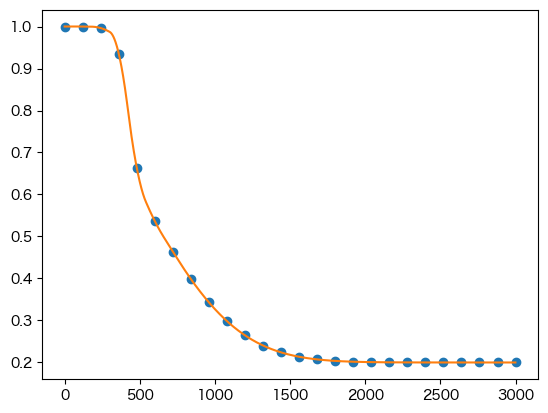

In [30]:
d = []
ff = list(range(0, 3001, 120))
for f in ff:
    d.append(demand_function(f, 1))
inp = interpolate.interp1d(ff, d, kind='quadratic')
ffnew = list(range(0,3000))
ynew = inp(ffnew)
plt.plot(ff,d, 'o')
plt.plot(ffnew,ynew, '-')

In [32]:
np.arange(0,0.3001,0.012)

array([0.   , 0.012, 0.024, 0.036, 0.048, 0.06 , 0.072, 0.084, 0.096,
       0.108, 0.12 , 0.132, 0.144, 0.156, 0.168, 0.18 , 0.192, 0.204,
       0.216, 0.228, 0.24 , 0.252, 0.264, 0.276, 0.288, 0.3  ])